In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.models as models
from torch.utils.data import DataLoader

import random
import os
import copy

import torch

import sys
sys.path.append("../../")

from src.model.TransferModel import run_style_transfer
from src.dataset.dataset import ImgDataset
from src.utils.other import *

In [2]:
# https://pytorch.org/tutorials/advanced/neural_style_tutorial.html
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

cnn = models.vgg19(pretrained=True).features.to(device).eval()

cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

## lucian high noon

In [3]:
outfolder = "../../results/weighted/traditional_style_images_256/"
os.system("mkdir -p " + str(outfolder))

0

In [4]:
style_dataset = ImgDataset("../../data/traditional_style_images/", imsize, device)
style_loader = DataLoader(style_dataset, batch_size=1, shuffle=False)

In [5]:
style_weight = 1000000
content_weight = 1

content_img = style_dataset.load_image("../../data/lucian-high-noon-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    if i == 6:
        break
style_img = style_img.squeeze(0)


# input
input_img = content_img.clone()
# run style transfer
output_1 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

style_weight = 1000000
content_weight = 100
# input
input_img = content_img.clone()
# run style transfer
output_2 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

style_weight = 1000000000
content_weight = 1
# input
input_img = content_img.clone()
# run style transfer
output_3 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output_1, axes[2], "Base")
imshow(output_2, axes[3], "Increased Content")
imshow(output_3, axes[4], "Increased Style")
plt.savefig(outfolder + "high_noon_lucian")
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 1434.199341 Content Loss: 29.859371

run [100]:
Style Loss : 215.117798 Content Loss: 31.246943

run [150]:
Style Loss : 86.656654 Content Loss: 31.740265

run [200]:
Style Loss : 39.398563 Content Loss: 32.009438

run [250]:
Style Loss : 22.642862 Content Loss: 31.530783

run [300]:
Style Loss : 14.734157 Content Loss: 30.935204

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 1496.060547 Content Loss: 2089.448242

run [100]:
Style Loss : 379.048157 Content Loss: 1827.309082

run [150]:
Style Loss : 294.278717 Content Loss: 1731.956543

run [200]:
Style Loss : 278.419861 Content Loss: 1770.462036

run [250]:
Style Loss : 298.695374 Content Loss: 1742.409546

run [300]:
Style Loss : 300.608276 Content Loss: 1782.607422

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 1395281.000000 Content Loss: 30.197552

run [100]:
Style Loss : 210606.000000 Content Loss: 31.617523


# yuumi

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 90.054398 Content Loss: 18.658617

run [100]:
Style Loss : 22.472137 Content Loss: 18.366035

run [150]:
Style Loss : 12.399916 Content Loss: 16.837671

run [200]:
Style Loss : 8.296538 Content Loss: 15.574037

run [250]:
Style Loss : 5.405431 Content Loss: 14.849719

run [300]:
Style Loss : 3.449194 Content Loss: 14.277597

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 210.382370 Content Loss: 805.533386

run [100]:
Style Loss : 158.749664 Content Loss: 737.039307

run [150]:
Style Loss : 148.703415 Content Loss: 724.651733

run [200]:
Style Loss : 158.409958 Content Loss: 751.462646

run [250]:
Style Loss : 31074798.000000 Content Loss: 53432.468750

run [300]:
Style Loss : 858.100403 Content Loss: 2143.899170

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 90125.218750 Content Loss: 19.606972

run [100]:
Style Loss : 21604.423828 Content Loss: 21.587748

run [15

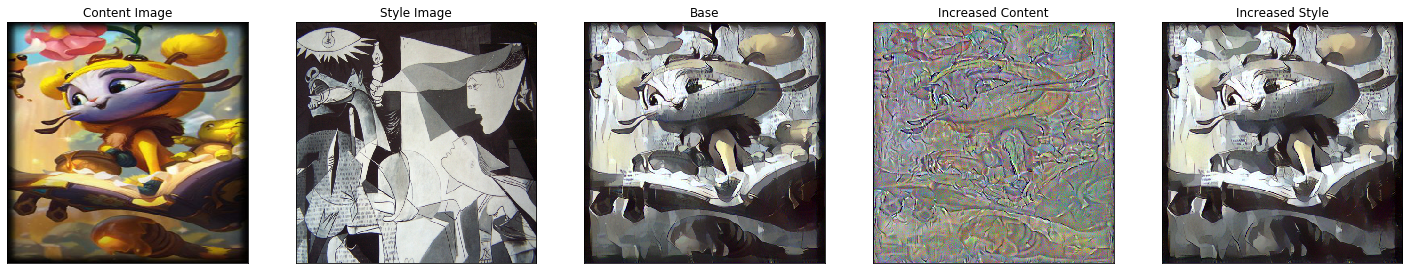

In [14]:
style_weight = 1000000
content_weight = 1

content_img = style_dataset.load_image("../../data/YuumiLoadScreen_19.PIE_C_11_5-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    pass
style_img = style_img.squeeze(0)


# input
input_img = content_img.clone()
# run style transfer
output_1 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

style_weight = 1000000
content_weight = 100
# input
input_img = content_img.clone()
# run style transfer
output_2 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

style_weight = 1000000000
content_weight = 1
# input
input_img = content_img.clone()
# run style transfer
output_3 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output_1, axes[2], "Base")
imshow(output_2, axes[3], "Increased Content")
imshow(output_3, axes[4], "Increased Style")
plt.savefig(outfolder + "yuumi")
plt.show()

# riven

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 393.509521 Content Loss: 21.845301

run [100]:
Style Loss : 132.840851 Content Loss: 22.040554

run [150]:
Style Loss : 58.414997 Content Loss: 22.101816

run [200]:
Style Loss : 31.155334 Content Loss: 21.786522

run [250]:
Style Loss : 19.098461 Content Loss: 21.202499

run [300]:
Style Loss : 12.596598 Content Loss: 20.530064

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 420.655487 Content Loss: 807.355408

run [100]:
Style Loss : 236.928116 Content Loss: 758.495422

run [150]:
Style Loss : 200.245682 Content Loss: 754.344360

run [200]:
Style Loss : 166.966064 Content Loss: 753.254578

run [250]:
Style Loss : 177.246628 Content Loss: 761.145020

run [300]:
Style Loss : 177.404694 Content Loss: 767.358398

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 409512.250000 Content Loss: 22.088736

run [100]:
Style Loss : 133815.421875 Content Loss: 22.723438

run [150

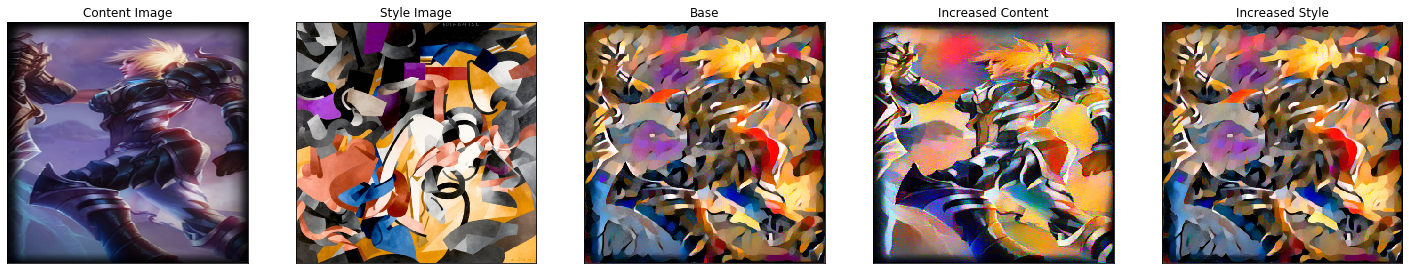

In [15]:
style_weight = 1000000
content_weight = 1

content_img = style_dataset.load_image("../../data/Riven_41-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    if i == 5:
        break
style_img = style_img.squeeze(0)


# input
input_img = content_img.clone()
# run style transfer
output_1 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

style_weight = 1000000
content_weight = 100
# input
input_img = content_img.clone()
# run style transfer
output_2 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

style_weight = 1000000000
content_weight = 1
# input
input_img = content_img.clone()
# run style transfer
output_3 = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for i in range(5):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output_1, axes[2], "Base")
imshow(output_2, axes[3], "Increased Content")
imshow(output_3, axes[4], "Increased Style")
plt.savefig(outfolder + "riven")
plt.show()